## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(23)  # fix the seed at the beginning and only once.
import time
from functions_albert import gauss_hermite_1d
from functions_albert import gini 
import seaborn as sns
import quantecon as qe   
import statsmodels.api as sm

In [2]:
# Part a
N = 100 
x_2 = np.random.normal(loc=0,scale=1,size=N)

# sigma^2=25 so sigma=5, which is what we use for the scale input 
e = np.random.normal(loc=0,scale=5,size=N)

y = 2 + (1/2) * x_2 + e

# Importing statsmodel which works out OLS 
# Add a constant term to the independent variable matrix as not having a constant may add bias into the equation
X_with_intercept = sm.add_constant(x_2)

model = sm.OLS(y, X_with_intercept)

results = model.fit()

# Print the summary of the regression
print(results.summary())

# Store beta_hat (estimated coefficients)
beta_hat = results.params

# Print the estimated coefficients
print("Estimated Coefficients (beta_hat):", beta_hat)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7682
Date:                Tue, 06 Feb 2024   Prob (F-statistic):              0.383
Time:                        14:04:45   Log-Likelihood:                -304.62
No. Observations:                 100   AIC:                             613.2
Df Residuals:                      98   BIC:                             618.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5958      0.518      3.083      0.0

In [3]:
# Store beta_hat (estimated coefficients)
beta_hat = results.params
beta_hat_0 = results.params[0]
beta_hat_1 = results.params[1]
# Print the estimated coefficients
print(r"Estimated Coefficients are", beta_hat_0, beta_hat_1)
# M=100 is not a very large number so leads to some inaccuracies in the initial estimations of the OLS parameters

Estimated Coefficients are 1.5957610374734532 0.4765652885206046


In [4]:
# Part b
T = 10000
N = 100
beta_hat_0_list = []
beta_hat_1_list = []
for t in range(T):
    x_2 = np.random.normal(loc=0,scale=1,size=N)
    e = np.random.normal(loc=0,scale=5,size=N)

    y = 2 + (1/2) * x_2 + e

    X_with_intercept = sm.add_constant(x_2)
    model = sm.OLS(y, X_with_intercept)

    results = model.fit()
    beta_hat_0_list.append(results.params[0])
    beta_hat_1_list.append(results.params[1])


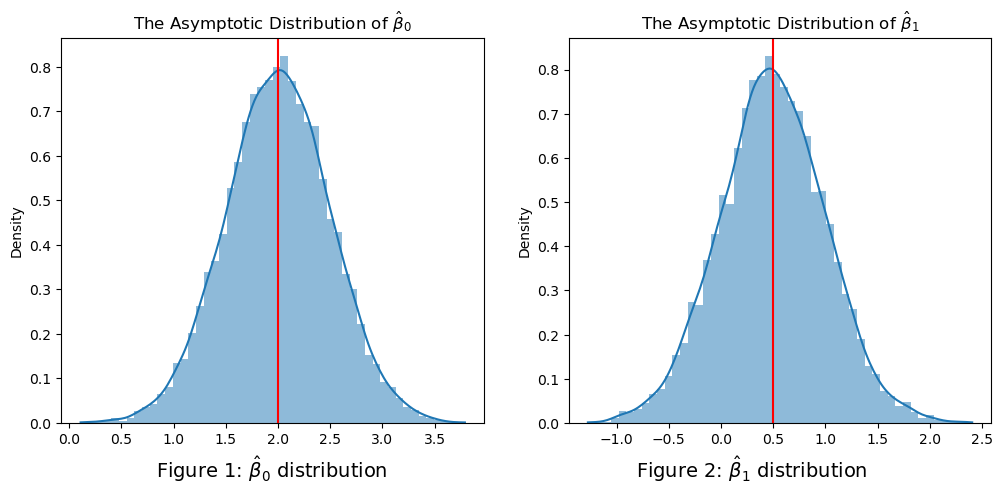

In [5]:
# Plotting the distribution and finding the mean values
b_hat_0_mean = np.mean(beta_hat_0_list)
b_hat_1_mean = np.mean(beta_hat_1_list)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=beta_hat_0_list, ax=axes[0], kde=True, stat='density', linewidth=0, bins=50)
axes[0].axvline(b_hat_0_mean, color='red', linestyle='-')
axes[0].set_title(r"The Asymptotic Distribution of $\hat{\beta}_0$")

sns.histplot(x=beta_hat_1_list, ax=axes[1], kde=True, stat='density', linewidth=0, bins=50)
axes[1].axvline(b_hat_1_mean, color='red', linestyle='-')
axes[1].set_title(r"The Asymptotic Distribution of $\hat{\beta}_1$")
fig.text(0.3, 0, r"Figure 1: $\hat{\beta}_0$ distribution", ha='center', ma='left', size=14)
fig.text(0.7, 0, r"Figure 2: $\hat{\beta}_1$ distribution", ha='center', ma='left', size=14)
plt.show()


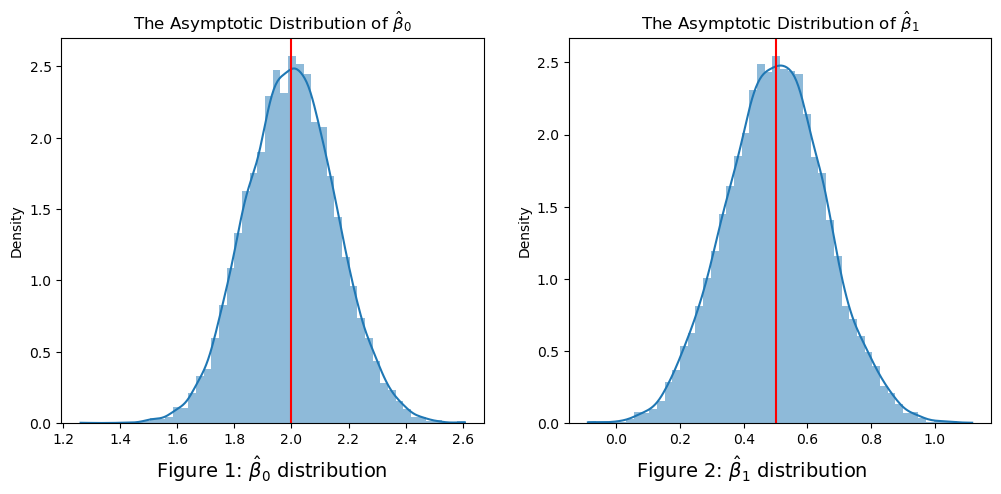

In [6]:
# Part c
# Changing N=1000
T = 10000
N = 1000
beta_hat_0_list = []
beta_hat_1_list = []
for t in range(T):
    x_2 = np.random.normal(loc=0,scale=1,size=N)
    e = np.random.normal(loc=0,scale=5,size=N)

    y = 2 + (1/2) * x_2 + e

    X_with_intercept = sm.add_constant(x_2)
    model = sm.OLS(y, X_with_intercept)

    results = model.fit()
    beta_hat_0_list.append(results.params[0])
    beta_hat_1_list.append(results.params[1])
# Plotting the distribution and finding the mean values
b_hat_0_mean = np.mean(beta_hat_0_list)
b_hat_1_mean = np.mean(beta_hat_1_list)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=beta_hat_0_list, ax=axes[0], kde=True, stat='density', linewidth=0, bins=50)
axes[0].axvline(b_hat_0_mean, color='red', linestyle='-')
axes[0].set_title(r"The Asymptotic Distribution of $\hat{\beta}_0$")

sns.histplot(x=beta_hat_1_list, ax=axes[1], kde=True, stat='density', linewidth=0, bins=50)
axes[1].axvline(b_hat_1_mean, color='red', linestyle='-')
axes[1].set_title(r"The Asymptotic Distribution of $\hat{\beta}_1$")
fig.text(0.3, 0, r"Figure 1: $\hat{\beta}_0$ distribution", ha='center', ma='left', size=14)
fig.text(0.7, 0, r"Figure 2: $\hat{\beta}_1$ distribution", ha='center', ma='left', size=14)
plt.show()

$\mathbb{E}(\hat{\beta}_{\text{OLS}})$ is the same for both, however by increasing N it decreases the variance of the distribution.

## Exercise 2

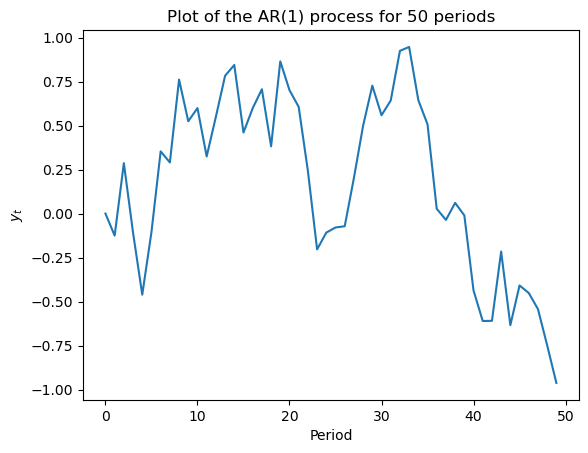

In [7]:
# Part a
def ar_1_sim(T=50,rho=0.95,y0=0,a=0,sigma_e=0.25):
    ''' 
    ar_1_sim simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,sigma_e)
    '''
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = a+ rho*y[i-1]+e
   
    return y

# Making the plot
y_values = ar_1_sim()
x_values = list(range(50))

plt.plot(x_values, y_values)

plt.xlabel('Period')
plt.ylabel(f'$y_t$')
plt.title('Plot of the AR(1) process for 50 periods')

# Show plot
plt.show()

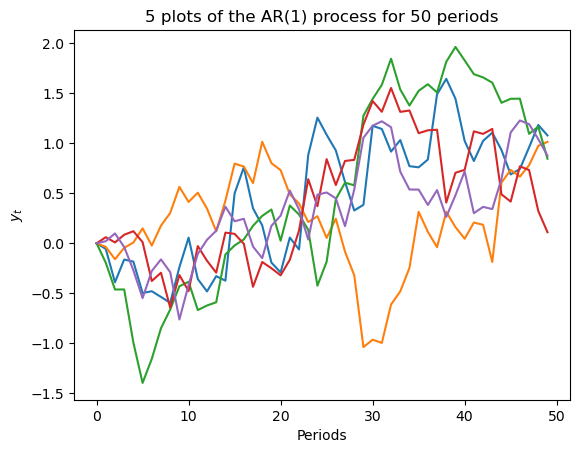

In [8]:
# Part b
def multiple_ar_1_sim(N, T):
    empty_matrix = np.zeros((N, T))
    for n in range(N):
        new_ar_1_process = ar_1_sim()
        empty_matrix[n,:] = new_ar_1_process
    return empty_matrix

# To keep the ar_1 values the same
ar_1 = multiple_ar_1_sim(5, 50)
x_values = list(range(50))
for n in range(5):
    y_values = ar_1[n,:]
    plt.plot(x_values, y_values)
plt.xlabel('Periods')
plt.ylabel(f'$y_t$')
plt.title('5 plots of the AR(1) process for 50 periods');


In [9]:
# Calculating the stationary values, sample mean, and sample variance
rho = 0.95
def stationarity(rho, a, sigma_e):
    if abs(rho)>=1:
        return 'The stochastic process is not stationary, and the variance of the the time series explodes'
    else:
        mu = a/(1-rho)
        v = (sigma_e**2)/(1-(rho**2))
        return print(f"The stochastic process is stationary, and the stationary mean is {mu}, \
while the stationary variance is {v}.")

sample_mean = np.mean(ar_1)
sample_variance = np.var(ar_1)
stationary_mean = sample_mean / (1 - rho)
stationary_variance = sample_variance / (1 - rho**2)

print(f"The sample mean is {sample_mean}, and the sample variance is {sample_variance}.")
stationarity(0.95, 0, 0.25)

The sample mean is 0.38505860180411305, and the sample variance is 0.43790608729816716.
The stochastic process is stationary, and the stationary mean is 0.0, while the stationary variance is 0.6410256410256409.


In [10]:
# Part d
def multiple_ar_1_sim(N, T):
    empty_matrix = np.zeros((N, T))
    for n in range(N):
        new_ar_1_process = ar_1_sim(T=1000)
        empty_matrix[n,:] = new_ar_1_process
    return empty_matrix

# To keep the ar_1 values the same
ar_1 = multiple_ar_1_sim(10000, 1000)

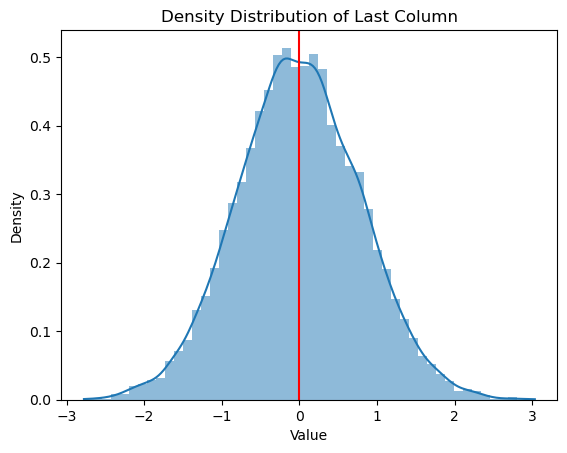

In [11]:
# Plot density distribution of the last column
sns.histplot(ar_1[:, -1], kde=True, stat='density', linewidth=0, bins=50)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Distribution of Last Column')
plt.axvline(np.mean(ar_1[:,-1]), color='red', linestyle='-')
plt.show()

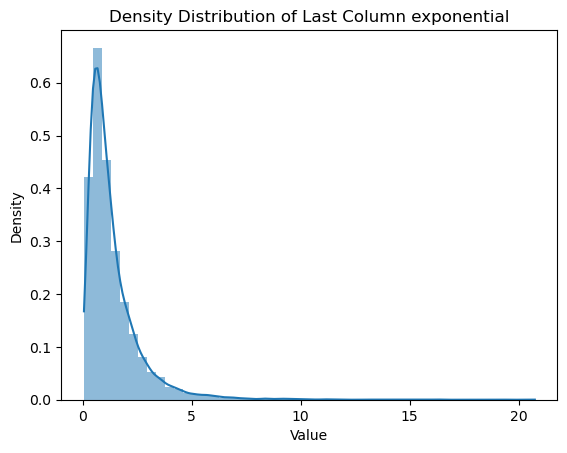

In [12]:
# Plot density distribution of the exponential last column
sns.histplot(np.exp(ar_1[:, -1]), kde=True, stat='density', linewidth=0, bins=50)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Distribution of Last Column exponential')
plt.show()

In [13]:
# Part e
mu = np.mean(ar_1[:, -1])
v = np.var(ar_1[:, -1])
print(f"The stationary mean is {mu}, and the stattionary variance is {v}.")

gini_coeff = gini(np.exp(ar_1[:, -1]))
print(f"The gini coefficient is {gini_coeff}.")

The stationary mean is -0.005993806268864437, and the stattionary variance is 0.6269166118040299.
The gini coefficient is 0.426912766072871.


/tmp/ipykernel_353/1093138829.py:2: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  qe.rouwenhorst(n=3, rho=0.95, sigma=0.25, mu=0.)


The resulting stationary distribution is N(0.0,0.6410256410256409), which can be seen below.


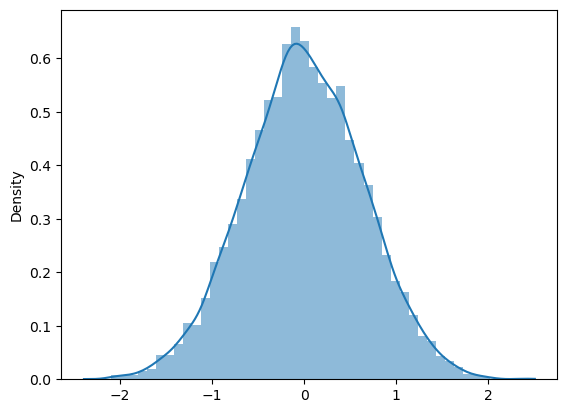

In [14]:
# Part f
qe.rouwenhorst(n=3, rho=0.95, sigma=0.25, mu=0.)
mu = 0/(1-0.95)
v = (0.25**2)/(1-(0.95**2))

sns.histplot(np.random.normal(mu,v,10000), kde=True, stat='density', linewidth=0, bins=50)
print(f"The resulting stationary distribution is N({mu},{v}), which can be seen below.")

## Exercise 3

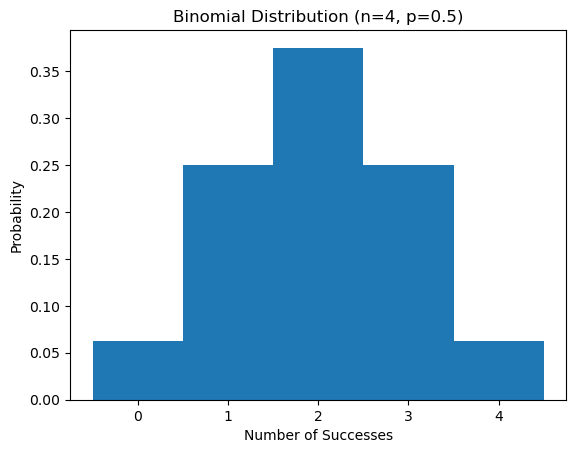

In [15]:
# Part a
n = 4
p = 0.5

# Simulate binomial distribution
binomial_data = np.random.binomial(n, p, size=1000000)

# Plot the resulting distribution
plt.hist(binomial_data, bins=np.arange(0, n+2)-0.5, density=True, linewidth=0)

# Add labels and title
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=4, p=0.5)')

# Show plot
plt.show()

In [16]:
# Part b
def g(x):
    return x**2

N = 1000000

X = np.random.poisson(lam=2,size=N)
g_X = g(X)

# Computing the sample average of g(X)
mc_integr_1 = np.mean(g_X)

print('Monte Carlo Integration of g(x)')
print('E[g(x)] =', round(mc_integr_1,6))

print(f"g(E(x)) = {round(g(np.mean(X)),6)}")
print('There is a difference because we square the values then take the mean in the monte-carlo integration, \
compared to taking the mean then squaring it.')


Monte Carlo Integration of g(x)
E[g(x)] = 5.988876
g(E(x)) = 3.99051
There is a difference because we square the values then take the mean in the monte-carlo integration, compared to taking the mean then squaring it.


## Exercise 4

In [17]:
# Part a
mu = 7.5
sigma = 0.8
N = 100000
y = np.random.lognormal(mean=mu, sigma=sigma, size=N)
avg_y = round(np.mean(y), 6)
var_y = round(np.var(y), 6)
gini_y = round(gini(y), 6)
print(f"The average of y is {avg_y}, the variance of y is {var_y} and the gini coefficient of y is {gini_y}.")

The average of y is 2492.125932, the variance of y is 5575553.631873 and the gini coefficient of y is 0.427762.


In [18]:
# Part b
c = (y)**(0.8) + (0.5)*y + 500
avg_c = round(np.mean(c), 6)
var_c = round(np.var(c), 6)
gini_c = round(gini(c), 6)
print(f"The average of y is {avg_c}, the variance of y is {var_c} and the gini coefficient of y is {gini_c}.")

The average of y is 2241.596161, the variance of y is 2344061.475698 and the gini coefficient of y is 0.314814.


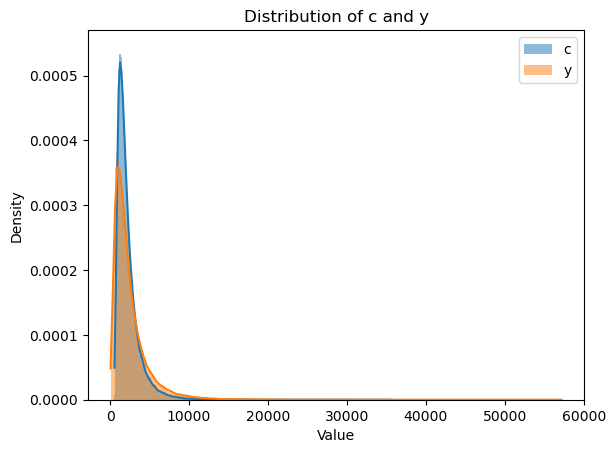

In [19]:
# Part c
sns.histplot(c, kde=True, stat='density', linewidth=0, label='c')
sns.histplot(y, kde=True, stat='density', linewidth=0, label='y')

plt.title('Distribution of c and y')
plt.xlabel('Value')
plt.legend()

plt.show()